# Exercise 1: The Driven Pendulum

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from math import pi

## Core Task 1

### Integrating the system
The differential equations in standard form:

$$\begin{align}\frac{d\theta}{dt}&=\omega \\ \frac{d\omega}{dt}&=-\sin\theta-q\omega+F\sin(\Omega t)\end{align}$$

In [2]:
def derivatives(t, y, q, F):
    return[y[1], -np.sin(y[0])-q*y[1]+F*np.sin(2*t/3)]

In [3]:
t_eval = np.linspace(0, 1000*(2*pi), 100000)

y_0=[0.01, 0]
sol1 = solve_ivp(derivatives, t_span=[0, 2000*pi], y0=y_0, args=(0, 0,), t_eval=t_eval)

y, dydx = sol1.y[0], sol1.y[1]


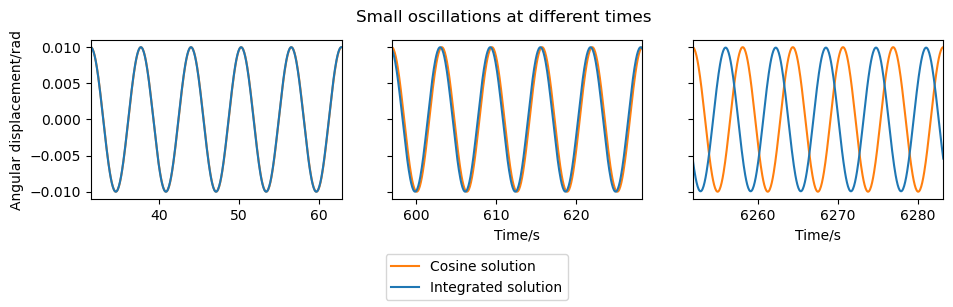

In [4]:
fig, axs = plt.subplots(1,3, figsize=(11, 3), sharey=True)

fig.suptitle('Small oscillations at different times')

plot_1, = axs[0].plot(t_eval, y_0[0]*np.cos(t_eval), color='tab:orange', label='Cosine solution')
plot_2, = axs[0].plot(t_eval, y, color='tab:blue', label='Integrated solution')

for i in range(1,3):
    axs[i].plot(t_eval, y_0[0]*np.cos(t_eval), color='tab:orange')
    axs[i].plot(t_eval, y, color='tab:blue')
    axs[i].set_xlabel('Time/s')

axs[0].set_ylabel('Angular displacement/rad')

axs[0].set_xlim(np.array([5, 10])*2*pi)
axs[1].set_xlim(np.array([95, 100])*2*pi)
axs[2].set_xlim(np.array([995, 1000])*2*pi)

fig.legend(handles=[plot_1,plot_2], labels=['Cosine solution', 'Integrated solution'], loc='lower center')
plt.subplots_adjust(bottom=0.35)

plt.show()

The true period of oscillation is at a constant offset to the real period $(2\pi\,\text{s})$
This introduces a linearly growing phase difference between the ideal solution and the calculated solution.

### Energy conservation
The energy of the system is given by:
$$E=-mgl\cos\theta+ \frac{1}{2} m l^2 \dot{\theta}^2 \implies \frac{E}{ml^2}=-\frac{g}{l}\cos\theta+\frac{1}{2}\dot{\theta}^2$$

In [5]:
def energy(theta, omega):
    return -np.cos(theta)+0.5*omega**2

Fractional energy loss is: 6.071224551282556e-07


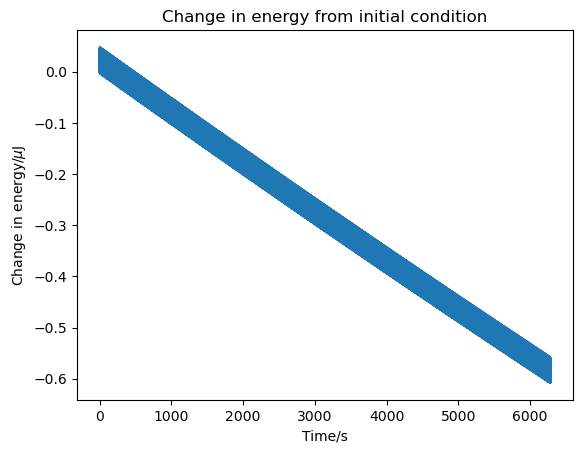

In [6]:
E_0 = energy(y_0[0], y_0[1])

E_t = energy(y, dydx)
print('Fractional energy loss is:' , str(np.abs((E_t[-1]-E_0)/E_0)))
plt.plot(t_eval, (E_t-E_0)*1e6)
plt.xlabel('Time/s')
plt.ylabel(r'Change in energy/$\mu$J')
plt.title(r'Change in energy from initial condition')
plt.show()

From this, the integrator does not conserve energy perfectly, and the loss is approximately linear. However, the magnitude of the energy loss is negligible.

### Variation of period
For initial amplitudes close to $\pi$, it is possible for the integrator to move the mass over the top due to errors.
To account for this, a "wrap" function is defined to constrain $\theta\in(-\pi,\pi]$

In [7]:
def wrap(y):
    for i, thet in enumerate(y):
        if thet > pi:
            y[i] = thet- 2*pi*np.ceil(thet/(2*pi))
        elif thet < -pi:
            y[i] = thet+2*pi*np.ceil(np.abs(thet)/(2*pi))
    return y

def find_period(t, y, tol):
    zeroes = []
    periods = []
    for i in range(len(y)):
        if y[i] < tol:
            zeroes.append(t[i])
    for j in range(len(zeroes)-1):
        period = 2*(zeroes[j+1]-zeroes[j])
        if period > 0.5:
            periods.append(period)
    return np.average(periods)
    

In [8]:
amp_range = np.linspace(0.01, pi*0.999, 250)
t_eval = np.linspace(0, (2*pi)*20, 10000)
amp_periods = []

for i in amp_range:
    y_0 = [i, 0]
    sol1 = solve_ivp(derivatives, t_span=[0, 40*pi], y0=y_0, method='DOP853', args=(0, 0,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
    y = sol1.y[0]
    amp_periods.append(find_period(t_eval, y, 1e-5))

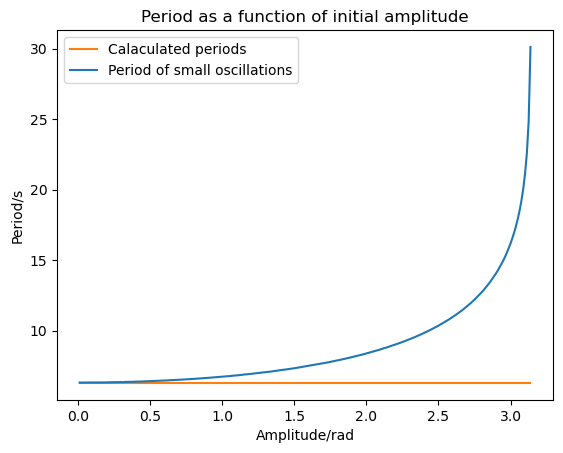

In [9]:
plt.plot(amp_range, np.repeat(2*pi, 250), color='tab:orange', label='Calaculated periods')
plt.plot(amp_range, amp_periods, color='tab:blue', label='Period of small oscillations')
plt.xlabel('Amplitude/rad')
plt.ylabel('Period/s')
plt.title('Period as a function of initial amplitude')
plt.legend()
plt.show()

The period increases asymptotically to infinity at $\theta_0=\pi$

### Core task 1 conclusion
Numerically solving the ODEs gives an oscillating solution.
The period of oscillation increases with period, asymptotically increasing to infinity, as $\theta_0=\pi$ leads to the mass staying on top.

# Core Task 2

In [10]:
t_eval = np.linspace(0, 5*(2*pi), 100000)

y_0=[0.1, 0]
sol1 = solve_ivp(derivatives, t_span=[0, 10*pi], y0=y_0, args=(1, 0,), t_eval=t_eval)
sol2 = solve_ivp(derivatives, t_span=[0, 10*pi], y0=y_0, args=(5, 0,), t_eval=t_eval)
sol3 = solve_ivp(derivatives, t_span=[0, 10*pi], y0=y_0, args=(10, 0,), t_eval=t_eval)

y1, dydx1 = sol1.y[0], sol1.y[1]
y2, dydx2 = sol2.y[0], sol2.y[1]
y3, dydx3 = sol3.y[0], sol3.y[1]

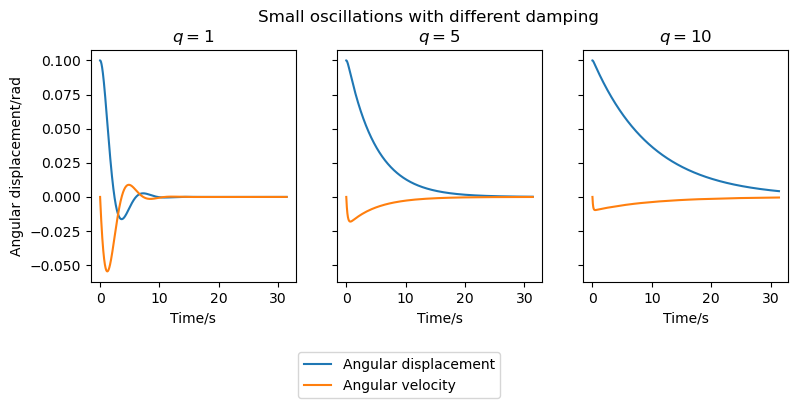

In [11]:
fig, axs = plt.subplots(1,3, figsize=(9, 4), sharey=True)

fig.suptitle('Small oscillations with different damping')

plot_1, = axs[0].plot(t_eval, y1, color='tab:blue')
plot_2, = axs[0].plot(t_eval, dydx1, color='tab:orange')
axs[0].set_title(r'$q=1$')
axs[0].set_xlabel('Time/s')

axs[1].plot(t_eval, y2, color='tab:blue')
axs[1].plot(t_eval, dydx2, color='tab:orange')
axs[1].set_title(r'$q=5$')
axs[1].set_xlabel('Time/s')

axs[2].plot(t_eval, y3, color='tab:blue')
axs[2].plot(t_eval, dydx3, color='tab:orange')
axs[2].set_title(r'$q=10$')
axs[2].set_xlabel('Time/s')

axs[0].set_ylabel('Angular displacement/rad')

fig.legend(handles=[plot_1,plot_2], labels=['Angular displacement', 'Angular velocity'], loc='lower center')
plt.subplots_adjust(bottom=0.3)

plt.show()

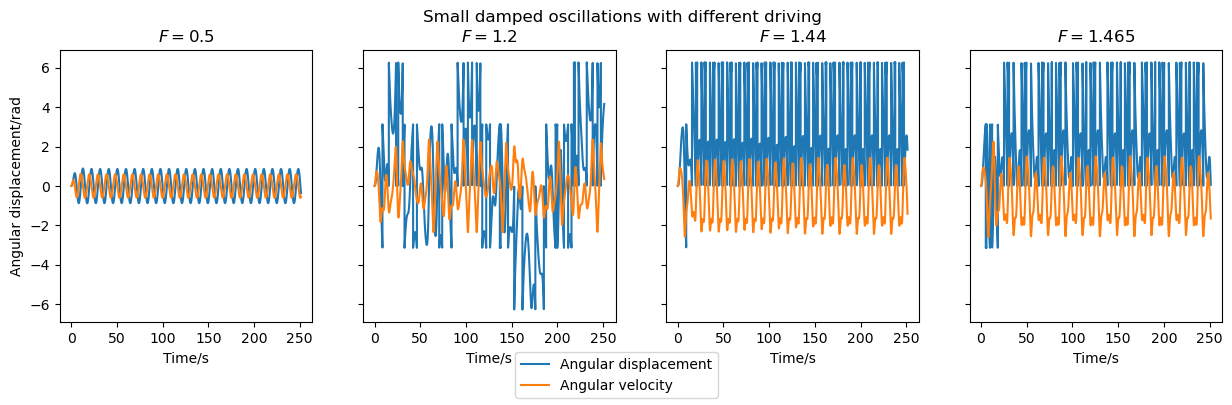

In [16]:
t_eval = np.linspace(0, 40*(2*pi), 10000)

fig, axs = plt.subplots(1, 4, figsize=(15, 4), sharey=True)

fig.suptitle('Small damped oscillations with different driving')

forces= [0.5, 1.2, 1.44, 1.465]
y_0 = [0.01, 0]

for i in range(4):
    sol = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_0, args=(0.5, forces[i],), t_eval=t_eval, atol=1e-8, rtol=1e-6)
    y, dydx = sol.y[0], sol.y[1]
    y=wrap(y)

    plot1 = axs[i].plot(t_eval, y, color='tab:blue')
    plot2 = axs[i].plot(t_eval, dydx, color='tab:orange')
    axs[i].set_xlabel('Time/s')
    axs[i].set_title(r'$F=$' + str(forces[i]))

axs[0].set_ylabel('Angular displacement/rad')

fig.legend(handles=[plot_1,plot_2], labels=['Angular displacement', 'Angular velocity'], loc='lower center')
plt.subplots_adjust(bottom=0.2)

plt.show()
                        

### Core Task 2 conclusions
With a periodic driving force, one can make the pendulum move periodically (after the transient solution decays). The period of this motion can be many multiples of the original period (For $F=1.2$, it is $\approx 200$ seconds)
a small change in driving force can lead to a large change in period (from $F=1.4$ to $F=1.65$, the period appears to double)

# Supplementary task 1

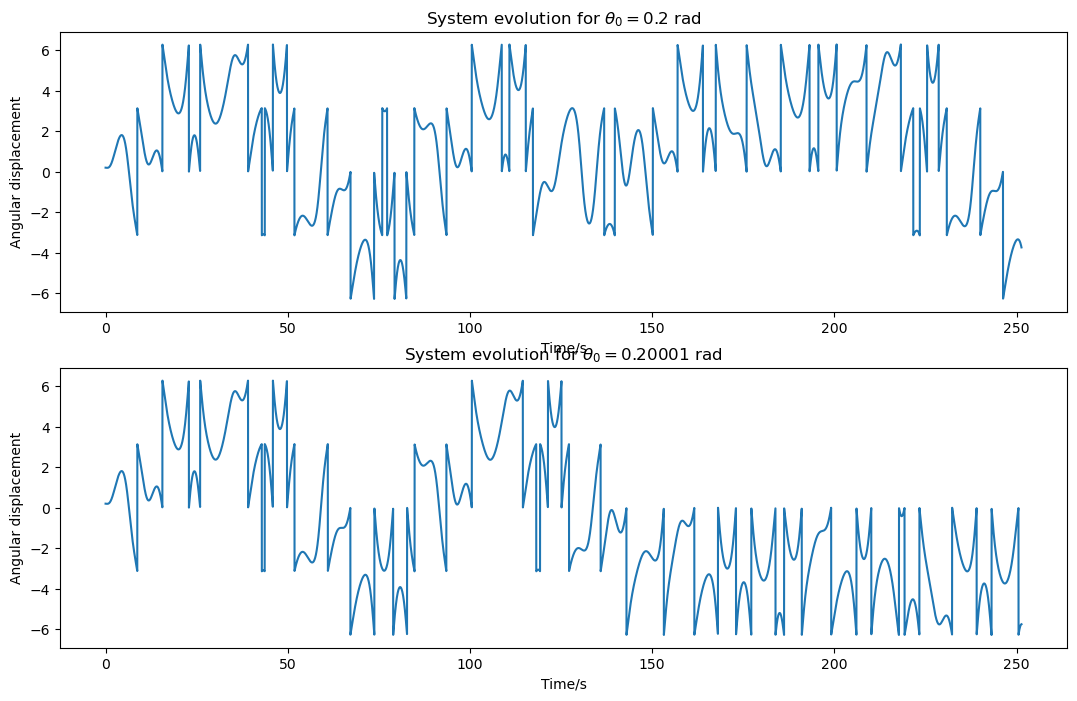

In [12]:
y_01 = [0.2, 0]
y_02 = [0.20001, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0.5, 1.2,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = wrap(sol1.y[0]), sol1.y[1]
sol2 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_02, args=(0.5, 1.2,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y2, dydx2 = wrap(sol2.y[0]), sol2.y[1]

fig, axs = plt.subplots(2, 1, figsize=(13, 8), sharey=True)

axs[0].plot(t_eval, y1)
axs[1].plot(t_eval, y2)
axs[0].set_xlabel('Time/s')
axs[1].set_xlabel('Time/s')
axs[0].set_title(r'System evolution for $\theta_0=0.2$ rad')
axs[1].set_title(r'System evolution for $\theta_0=0.20001$ rad')
axs[0].set_ylabel('Angular displacement')
axs[1].set_ylabel('Angular displacement')
plt.show()

### Supplementary Task 1 conclusion
The system is sensitive to initial conditions. For two slightly different initial configurations, they may behave similarly for a finite amount of time before their behaviours diverge.

# Supplementary Task 2

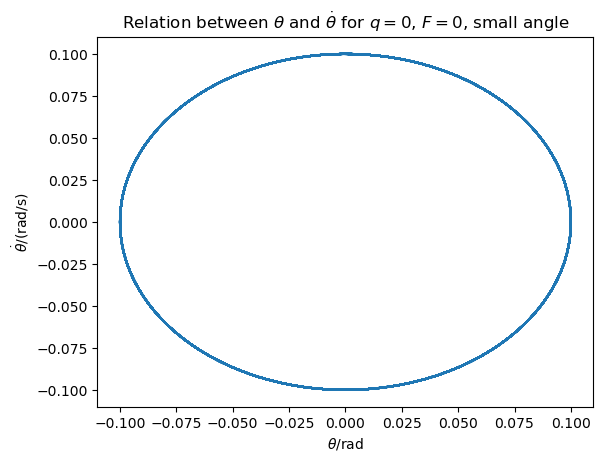

In [20]:
y_01 = [0.1, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0, 0,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = sol1.y[0], sol1.y[1]

plt.plot(y1, dydx1)
plt.title(r'Relation between $\theta$ and $\dot{\theta}$ for $q=0$, $F=0$, small angle')
plt.xlabel(r'$\theta$/rad')
plt.ylabel(r'$\dot{\theta}$/(rad/s)')
plt.show()

For simple harmonic motion, the $\theta-\dot{\theta}$ plot for a pendulum is an ellipse.

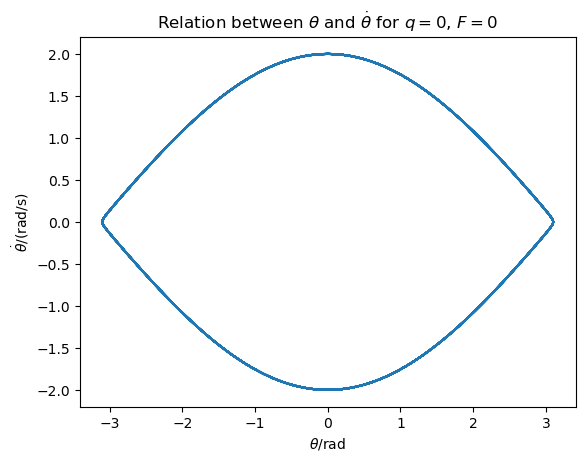

In [18]:
y_01 = [3.1, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0, 0,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = sol1.y[0], sol1.y[1]

plt.plot(y1, dydx1)
plt.title(r'Relation between $\theta$ and $\dot{\theta}$ for $q=0$, $F=0$')
plt.xlabel(r'$\theta$/rad')
plt.ylabel(r'$\dot{\theta}$/(rad/s)')
plt.show()

When starting at large initial angles, the pattern deviates from the perfect ellipse and becomes sharper at large angles.

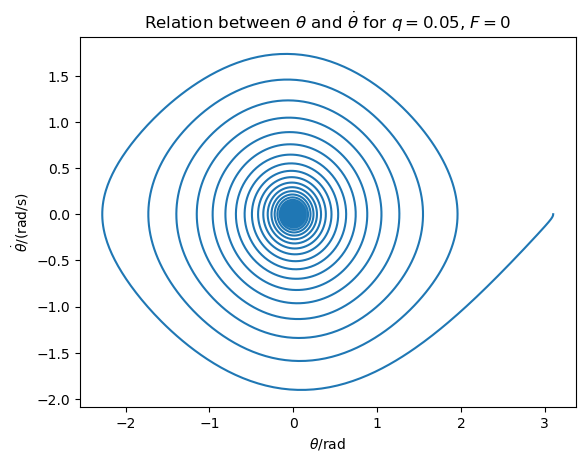

In [15]:
y_01 = [3.1, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0.05, 0,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = sol1.y[0], sol1.y[1]

plt.plot(y1, dydx1)
plt.title(r'Relation between $\theta$ and $\dot{\theta}$ for $q=0.05$, $F=0$')
plt.xlabel(r'$\theta$/rad')
plt.ylabel(r'$\dot{\theta}$/(rad/s)')
plt.show()

With damping, the plot spirals in. An inward-spiralling pattern indicates energy loss due to damping.

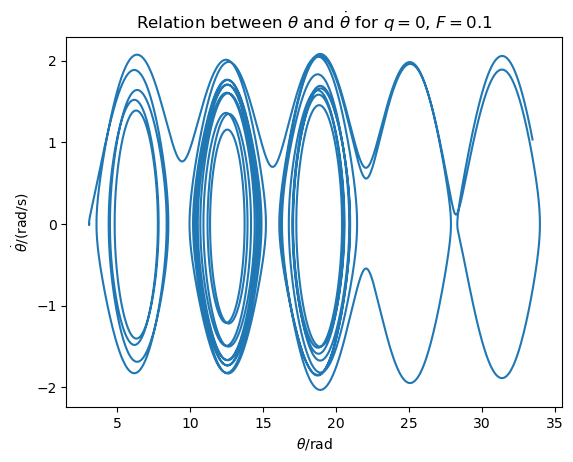

In [16]:
y_01 = [3.1, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0, 0.1,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = sol1.y[0], sol1.y[1]

plt.plot(y1, dydx1)
plt.title(r'Relation between $\theta$ and $\dot{\theta}$ for $q=0$, $F=0.1$')
plt.xlabel(r'$\theta$/rad')
plt.ylabel(r'$\dot{\theta}$/(rad/s)')
plt.show()

With a driving force (and no damping), a pendulum can be stationary at different angles within one period, and also go over the top multiple times.

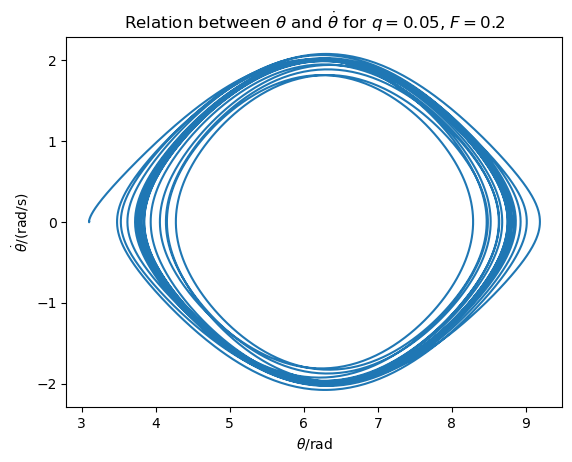

In [21]:
y_01 = [3.1, 0]

t_eval = np.linspace(0, 40*(2*pi), 10000)

sol1 = solve_ivp(derivatives, t_span=[0, 80*pi], y0=y_01, args=(0.05, 0.2,), t_eval=t_eval, atol=1e-8, rtol=1e-6)
y1, dydx1 = sol1.y[0], sol1.y[1]

plt.plot(y1, dydx1)
plt.title(r'Relation between $\theta$ and $\dot{\theta}$ for $q=0.05$, $F=0.2$')
plt.xlabel(r'$\theta$/rad')
plt.ylabel(r'$\dot{\theta}$/(rad/s)')
plt.show()

With both damping and a driving force, the energy of the pendulum varies within a fixed range.